# Overcooked Tutorial
This Notebook will demonstrate a couple of common use cases of the Overcooked Ai Library, including loading and evaluating agents and visualizing trajectories. Ideally we will have a Colab notebook you can interact with, but sadly Colab only supports python 3.10 kernel, and currently there are problems loading files pickled in 3.7 environment. As a compromise we created this notebook where you can see some examples of the most frequently used methods after they are executed


# 0): Training you agent
The most convenient way to train an agent is with the [ppo_rllib_client.py](https://github.com/HumanCompatibleAI/overcooked_ai/blob/master/src/human_aware_rl/ppo/ppo_rllib_client.py) file, where you can either pass in the arguments through commandline, or you can directly modify the variables you want to change in the file. 

You can also start an experiment in another python script like the following, which can sometimes be more convenient:

Computing MediumLevelActionManager
Computing MediumLevelActionManager


Computing MediumLevelActionManager


{'both_agent_obs': (array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  0., -1.,
          2.,  0.,  0.,  0.,  0.,  2., -1.,  0.,  0.,  1.,  1.,  0.,  0.,
          0.,  0.,  0.,  0., -2.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
          0., -2.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.,  0., -1., -2.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  2.,
         -2.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,
          1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  3., -1.,  0.,  1.,  0.,
          1., -5.,  1.,  6.,  2.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -2.,  0.,  0.,  2.,
          1.,  0.,  0.,  0.,  0.,  2., -2.,  0.,  0.,  1.,  1.,  0.,  0.,
          0.,  0.,  0.,  0.,  3.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.,  3., -1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.,  0., -1., -1.,  0.,  0., -1.,  2.,  0.,  0.,  0.,  0.,  2.,
         -1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,

({'both_agent_obs': (array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  0.,  2.,
           2.,  0.,  0.,  0.,  0.,  2., -1.,  0.,  0.,  1.,  1.,  0.,  0.,
           0.,  0.,  0.,  0.,  3.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
           0.,  3.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
           0.,  0., -1., -1.,  0.,  0., -1.,  2.,  0.,  0.,  0.,  0.,  2.,
          -1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0., -2.,  0.,
           1.,  1.,  0.,  0.,  0.,  0.,  0.,  0., -2.,  1.,  1.,  0.,  0.,
           0.,  5.,  0.,  1.,  2.]),
   array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  0., -1.,
           2.,  0.,  0.,  0.,  0.,  2., -1.,  0.,  0.,  1.,  1.,  0.,  0.,
           0.,  0.,  0.,  0., -2.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
           0., -2.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
           0.,  0., -1., -1.,  0.,  0.,  2.,  2.,  0.,  0.,  0.,  0.,  2.,
          -1.,  0.,  0.,  1.,  1.,  0.,  0., 

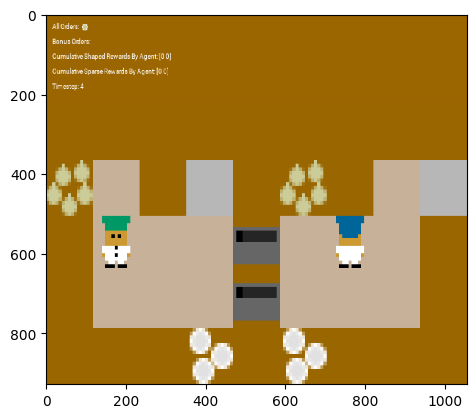

In [1]:
from human_aware_rl.ppo.ppo_rllib_client import ex
# For all the tunable paramters, check out ppo_rllib_client.py file
# Note this is not what the configuration should look like for a real experiment
config_updates = {
    "results_dir": "path/to/results", #change this to your local directory
    "layout_name": "cramped_room",
    "clip_param": 0.2,
    'gamma': 0.9,
    'num_training_iters': 10, #this should usually be a lot higher
    'num_workers': 1,
    'num_gpus': 0,
    "verbose": False,
    'train_batch_size': 800,
    'sgd_minibatch_size': 800,
    'num_sgd_iter': 1,
    "evaluation_interval": 2
}
run = ex.run(config_updates=config_updates, options={"--loglevel": "ERROR"})

One can check the results of the experiment run by accessing **run.result**

In [2]:
result = run.result
result

{'average_sparse_reward': 0.0, 'average_total_reward': 14.290098302224868}

In practice, the reward should be much higher if optimized. Checkout the graph in the [README](https://github.com/HumanCompatibleAI/overcooked_ai/tree/master/src/human_aware_rl) in human_aware_rl module for baseline performances.

Similarly, you can train BC agents with the [reproduce_bc.py](https://github.com/HumanCompatibleAI/overcooked_ai/blob/master/src/human_aware_rl/imitation/reproduce_bc.py) file under the human_aware_rl/imitation directory. 

In [3]:
layout = "cramped_room" # any compatible layouts 
from human_aware_rl.imitation.behavior_cloning_tf2 import (
    get_bc_params, # get the configuration for BC agents
    train_bc_model, # train the BC model
)
from human_aware_rl.static import (
    CLEAN_2019_HUMAN_DATA_TRAIN, # human trajectories
)

params_to_override = {
    # this is the layouts where the training will happen
    "layouts": [layout], 
    # this is the layout that the agents will be evaluated on
    # Most of the time they should be the same, but because of refactoring some old layouts have more than one name and they need to be adjusted accordingly
    "layout_name": layout, 
    "data_path": CLEAN_2019_HUMAN_DATA_TRAIN,
    "epochs": 10,
    "old_dynamics": True,
}

bc_params = get_bc_params(**params_to_override)
train_bc_model("path/to/bc_dir", bc_params, verbose = True)


Loading data from /Users/jacksonyan/Desktop/project_with_Micah/overcooked_ai/src/human_aware_rl/static/human_data/cleaned/2019_hh_trials_train.pickle
Number of trajectories processed for each layout: {'cramped_room': 14}
Train on 28539 samples, validate on 5037 samples


WARNING - tensorflow - OMP_NUM_THREADS is no longer used by the default Keras config. To configure the number of threads, use tf.config.threading APIs.


Epoch 1/10
28539/28539 - 1s - loss: 0.9522 - sparse_categorical_accuracy: 0.7216 - val_loss: 0.8845 - val_sparse_categorical_accuracy: 0.7058 - lr: 0.0010 - 576ms/epoch - 20us/sample
Epoch 2/10
28539/28539 - 0s - loss: 0.8393 - sparse_categorical_accuracy: 0.7250 - val_loss: 0.8123 - val_sparse_categorical_accuracy: 0.7036 - lr: 0.0010 - 354ms/epoch - 12us/sample
Epoch 3/10
28539/28539 - 0s - loss: 0.8052 - sparse_categorical_accuracy: 0.7262 - val_loss: 0.7980 - val_sparse_categorical_accuracy: 0.7032 - lr: 0.0010 - 355ms/epoch - 12us/sample
Epoch 4/10
28539/28539 - 0s - loss: 0.7869 - sparse_categorical_accuracy: 0.7244 - val_loss: 0.7843 - val_sparse_categorical_accuracy: 0.7020 - lr: 0.0010 - 354ms/epoch - 12us/sample
Epoch 5/10
28539/28539 - 0s - loss: 0.7748 - sparse_categorical_accuracy: 0.7239 - val_loss: 0.7741 - val_sparse_categorical_accuracy: 0.7070 - lr: 0.0010 - 385ms/epoch - 13us/sample
Epoch 6/10
28539/28539 - 0s - loss: 0.7669 - sparse_categorical_accuracy: 0.7227 - va

# 1): Loading trained agents
This section will show you how to load a pretrained agents. To load an agent, you can use the load_agent function in the [rllib.py](https://github.com/HumanCompatibleAI/overcooked_ai/blob/master/src/human_aware_rl/rllib/rllib.py) file. For the purpose of demonstration, I will be loading a local agent, which is also one of the agents included in the web demo. 

## 1.1): Loading PPO agent
The PPO agents are all trained via the Ray trainer, so to load a trained agent, we can just use the load_agent function

In [4]:
from human_aware_rl.rllib.rllib import load_agent
agent_path = "src/overcooked_demo/server/static/assets/agents/RllibCrampedRoomSP/agent"
# The first argument is the path to the saved trainer, we then loads the agent associated with that trainner
## If you use the experiment setup provided, the saved path should be the results_dir in the configuration
# The second argument is the type of agent to load, which only matters if it is not a self-play agent 
# The third argument is the agent_index, which is not directly related to the training
## It is used in creating the RllibAgent class that is used for evaluation
ppo_agent = load_agent(agent_path,"ppo",0)
ppo_agent

2023-05-05 13:02:16,984	WARNING deprecation.py:48 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!


This function loads an agent from the trainer. The RllibAgent class is a wrapper around the core policy, which simplifies pairing and evaluating different type of agents.


## 1.2) Loading BC agent
The BC (behavior cloning) agents are trained separately without using Ray. We showed how to train a BC agent in the previous section, and to load a trained agent, we can use the load_bc_model function

In [5]:
from human_aware_rl.imitation.behavior_cloning_tf2 import load_bc_model
#this is the same path you used when training the BC agent
bc_model_path = "src/human_aware_rl/imitation/bc_runs/train/cramped_room"
bc_model, bc_params = load_bc_model(bc_model_path)
bc_model, bc_params

(<keras.engine.functional.Functional at 0x7fc0e970cf50>,
 {'eager': True,
  'use_lstm': False,
  'cell_size': 256,
  'data_params': {'layouts': ['cramped_room'],
   'check_trajectories': False,
   'featurize_states': True,
   'data_path': '/Users/jacksonyan/Desktop/project_with_Micah/overcooked_ai/src/human_aware_rl/static/human_data/cleaned/2019_hh_trials_train.pickle'},
  'mdp_params': {'layout_name': 'cramped_room', 'old_dynamics': True},
  'env_params': {'horizon': 400,
   'mlam_params': {'start_orientations': False,
    'wait_allowed': False,
    'counter_goals': [],
    'counter_drop': [],
    'counter_pickup': [],
    'same_motion_goals': True}},
  'mdp_fn_params': {},
  'mlp_params': {'num_layers': 2, 'net_arch': [64, 64]},
  'training_params': {'epochs': 100,
   'validation_split': 0.15,
   'batch_size': 64,
   'learning_rate': 0.001,
   'use_class_weights': False},
  'evaluation_params': {'ep_length': 400, 'num_games': 1, 'display': False},
  'action_shape': (6,),
  'observat

Now that we have loaded the model, since we used Tensorflow to train the agent, we need to wrap it so it is compatible with other agents. We can do it by converting it to a Rllib-compatible policy class, and wraps it as a RllibAgent. 

In [6]:
from human_aware_rl.imitation.behavior_cloning_tf2 import _get_base_ae, BehaviorCloningPolicy
bc_policy = BehaviorCloningPolicy.from_model(
        bc_model, bc_params, stochastic=True
    )
# We need the featurization function that is specifically defined for BC agent
# The easiest way to do it is to create a base environment from the configuration and extract the featurization function
# The environment is also needed to do evaluation

base_ae = _get_base_ae(bc_params)
base_env = base_ae.env

from human_aware_rl.rllib.rllib import RlLibAgent
bc_agent = RlLibAgent(bc_policy,0,base_env.featurize_state_mdp)
bc_agent

Now we have a BC agent that is ready for evaluation 

## 1.3) Loading & Creating Agent Pair

To do evaluation, we need a pair of agents, or an AgentPair. We can directly load a pair of agents for evaluation, which we can do with the load_agent_pair function, or we can create an AgentPair manually from 2 separate RllibAgent instance. To directly load an AgentPair from a trainer:

In [7]:
from human_aware_rl.rllib.rllib import load_agent_pair
# if we want to load a self-play agent
ap_sp = load_agent_pair(agent_path,"ppo","ppo")
ap_sp 

2023-05-05 13:02:19,320	WARNING deprecation.py:48 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!


This is convenient when the agents trained are not self-play agents. For example, if we have a PPO agent trained with a BC agent, we can load both as an agent pair at the same time. 

In [11]:
bc_agent_path = "src/overcooked_demo/server/static/assets/agents/RllibCrampedRoomBC/agent"
ap_bc = load_agent_pair(bc_agent_path,"ppo","bc")
ap_bc

error creating custom logging dir. Falling back to default logdir /Users/jacksonyan/ray_results


2023-05-05 13:04:44,153	WARNING deprecation.py:48 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!


To create an AgentPair manually, we can just pair together any 2 RllibAgent object. For example, we have created a **ppo_agent** and a **bc_agent**. To pair them up, we can just construct an AgentPair with them as arguments.

In [12]:
from human_aware_rl.rllib.rllib import AgentPair
ap = AgentPair(ppo_agent,bc_agent)
ap

# 2): Evaluating AgentPair

To evaluate an AgentPair, we need to first create an AgentEvaluator. You can create an AgentEvaluator in various ways, but the simpliest way to do so is from the layout_name. 

You can modify the settings of the layout by changing the **mdp_params** argument, but most of the time you should only need to include "layout_name", which is the layout you want to evaluate the agent pair on, and "old_dynamics", which determines whether the envrionment conforms to the design in the Neurips2019 paper, or whether the cooking should start automatically when all ingredients are present.  

For the **env_params**, you can change how many steps are there in one evaluation. The default is 400, which means the game runs for 400 timesteps. 

In [13]:
from overcooked_ai_py.agents.benchmarking import AgentEvaluator
# Here we create an evaluator for the cramped_room layout
layout = "cramped_room"
ae = AgentEvaluator.from_layout_name(mdp_params={"layout_name": layout, "old_dynamics": True}, 
                                     env_params={"horizon": 400})
ae

To run evaluations, we can use the evaluate_agent_pair method associated with the AgentEvaluator:

In [14]:
# ap_sp: The AgentPair we created earlier
# 10: how many times we should run the evaluation since the policy is stochastic
# 400: environment timestep horizon, 
## should not be necessary is the AgentEvaluator is created with a horizon, but good to have for clarity
result = ae.evaluate_agent_pair(ap_sp,10,400)
result

Avg rew: 222.00 (std: 10.77, se: 3.41); avg len: 400.00; : 100%|█| 10/10 [00:09<


{'ep_returns': array([220, 220, 220, 220, 200, 240, 220, 220, 220, 240]),
 'mdp_params': array([{'layout_name': 'cramped_room', 'terrain': [['X', 'X', 'P', 'X', 'X'], ['O', ' ', ' ', ' ', 'O'], ['X', ' ', ' ', ' ', 'X'], ['X', 'D', 'X', 'S', 'X']], 'start_player_positions': [(1, 2), (3, 1)], 'start_bonus_orders': [], 'rew_shaping_params': {'PLACEMENT_IN_POT_REW': 3, 'DISH_PICKUP_REWARD': 3, 'SOUP_PICKUP_REWARD': 5, 'DISH_DISP_DISTANCE_REW': 0, 'POT_DISTANCE_REW': 0, 'SOUP_DISTANCE_REW': 0}, 'start_all_orders': [{'ingredients': ['onion', 'onion', 'onion']}]},
        {'layout_name': 'cramped_room', 'terrain': [['X', 'X', 'P', 'X', 'X'], ['O', ' ', ' ', ' ', 'O'], ['X', ' ', ' ', ' ', 'X'], ['X', 'D', 'X', 'S', 'X']], 'start_player_positions': [(1, 2), (3, 1)], 'start_bonus_orders': [], 'rew_shaping_params': {'PLACEMENT_IN_POT_REW': 3, 'DISH_PICKUP_REWARD': 3, 'SOUP_PICKUP_REWARD': 5, 'DISH_DISP_DISTANCE_REW': 0, 'POT_DISTANCE_REW': 0, 'SOUP_DISTANCE_REW': 0}, 'start_all_orders': [{'ingr

The result returned by the AgentEvaluator contains detailed information about the evaluation runs, including actions taken by each agent at each timestep. Usually you don't need to directly interact with them, but the most direct performance measures can be retrieved with result["ep_returns"], which returns the average sparse reward of each evaluation run

In [15]:
result["ep_returns"]

array([220, 220, 220, 220, 200, 240, 220, 220, 220, 240])

In [16]:
# we can use any AgentPair class, like the ap_bc object we created earlier
# as we can see the performance is not as good as the self-play agents
result = ae.evaluate_agent_pair(ap_bc,10,400)

Avg rew: 156.00 (std: 14.97, se: 4.73); avg len: 400.00; : 100%|█| 10/10 [00:12<


# 3): Visualization

We can also visualize the trajectories of agents. One way is to run the web demo with the agents you choose, and the specific instructions can be found in the [overcooked_demo](https://github.com/HumanCompatibleAI/overcooked_ai/tree/master/src/overcooked_demo) module, which requires some setup. Another simpler way is to use the StateVisualizer, which uses the information returned by the AgentEvaluator to create a simple dynamic visualization. You can checkout [this Colab Notebook](https://colab.research.google.com/drive/1AAVP2P-QQhbx6WTOnIG54NXLXFbO7y6n#scrollTo=6Xlu54MkiXCR) that let you play with fixed agents

In [ ]:
from overcooked_ai_py.visualization.state_visualizer import StateVisualizer
# here we use the self-play agentPair created earlier again
trajs = ae.evaluate_agent_pair(ap_sp,10,400)
StateVisualizer().display_rendered_trajectory(trajs, ipython_display=True)

This should spawn a window where you can see what the agents are doing at each timestep. You can drag the slider to go forward and backward in time.